In [1]:
ls

README.md  api_calls.ipynb  new.ipynb


In [2]:
import requests
import os

In [3]:
baseUrl = "https://geodeepdive.org/api/"
searchMenthod = "snippets"

In [4]:
searchAsk = "?term="
searchTerm = "python"

In [16]:
config0 = "&min_published=2016-01"
config1 = "&full_results"
config2 = "&article_limit=10000"

In [17]:
url = baseUrl + searchMenthod + searchAsk + searchTerm + config0 + config1 + config2
url

'https://geodeepdive.org/api/snippets?term=python&min_published=2016-01&full_results&article_limit=10000'

In [18]:
r = requests.get(url)


In [19]:
rawData = r.json()

In [20]:
rawData

{'success': {'v': 1,
  'next_page': 'https://geodeepdive.org/api/snippets?scroll_id=3fe979e2-9b97-41ad-ae33-e56c1cef29b7',
  'scrollId': '3fe979e2-9b97-41ad-ae33-e56c1cef29b7',
  'hits': 32174,
  'data': [{'pubname': 'Visual Culture in Britain',
    'publisher': 'Taylor and Francis',
    '_gddid': '5ab49812cf58f164e02d858f',
    'title': 'Virilizing and Valorizing Homoeroticism: Eugen Sandow’s Queering of Body Cultures Before and After the Wilde Trials',
    'doi': '10.1080/14714787.2017.1321224',
    'coverDate': '2017 03',
    'URL': 'https://www.tandfonline.com/doi/full/10.1080/14714787.2017.1321224',
    'authors': 'Brauer, Fae',
    'highlight': ['photograph, Frederic Leighton, Athlete Wrestling a <em class="hl">Python</em>, 1877, bronze, 174.6x98.4x109 cm; Tate Britain,',
     'by Frederic Leighton’s An Athlete Wrestling with a <em class="hl">Python</em> (Figure 7) and Hamo Thornycroft’s Teucer',
     'Aestheticism as Leighton’s Athlete Wrestling with a <em class="hl">Python</em>

In [21]:
len(rawData['success']["data"])

500

Only get 500 results per page

In [22]:
#### Function that takes in a json with a data key that is a list of objects. It takes those objects in the the data array and
#### Within each object there is a key for coverDate that is in the format of YYYY MM. Take those date and plot how many articles
#### per year in a seaborn bar chart
def plotArticleByYear(data):
    years = []
    for article in data:
        digits = [int(s) for s in article["coverDate"].split() if s.isdigit()]
        year = 0
        for digit in digits:
            if digit > 1000:
                year = digit
        #year = article["coverDate"].split(" ")[0]
        years.append(year)
    years.sort()
    years = list(map(int, years))
    years = list(set(years))
    years.sort()
    # years = list(map(str, years))
    # years
    counts = []
    for year in years:
        count = 0
        for article in data:
            digits = [int(s) for s in article["coverDate"].split() if s.isdigit()]
            thisYear = 0
            for digit in digits:
                if digit > 1000:
                    thisYear = digit
            if thisYear == year:
                count += 1
        counts.append(count)
    counts

    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="darkgrid")
    ax = sns.barplot(x=years, y=counts)
    plt.show()

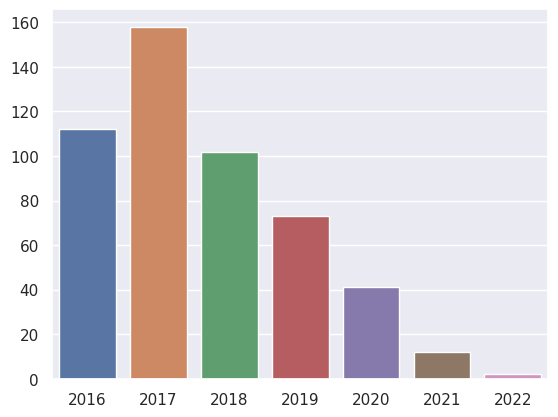

In [23]:
plotArticleByYear(rawData["success"]["data"])

Let's get all the other page

In [13]:
rawData

{'success': {'v': 1,
  'next_page': 'https://geodeepdive.org/api/snippets?scroll_id=765dac18-b8da-488f-9fdd-0f7e75a84b51',
  'scrollId': '765dac18-b8da-488f-9fdd-0f7e75a84b51',
  'hits': 36675,
  'data': [{'pubname': 'Journal of Fish Biology',
    'publisher': 'Wiley',
    '_gddid': '58967213cf58f161d04cea96',
    'title': 'Food intake rates of inactive fish are positively linked to boldness in three-spined sticklebacks Gasterosteus aculeatus',
    'doi': '10.1111/jfb.12934',
    'coverDate': '2016 04',
    'URL': 'http://doi.wiley.com/10.1111/jfb.12934',
    'authors': 'Jolles, J. W.; Manica, A.; Boogert, N. J.',
    'highlight': ['subsequently tracked using custom tracking scripts in <em class="hl">Python</em> (version 2.7.5; www.python.org), providing']},
   {'pubname': 'Journal of Applied Ecology',
    'publisher': 'Wiley',
    '_gddid': '58978b8ccf58f1ae8bfe22f2',
    'title': 'Invasion pathways at a crossroad: policy and research challenges for managing alien species introduction

In [24]:
#### Function that takes in a json result like Output exceeds the size limit. Open the full output data in a text editor{'success': {'v': 1,
####  'next_page': 'https://geodeepdive.org/api/snippets?scroll_id=34b74ad4-4b11-437a-bf37-07f4ea40923a',
####  'scrollId': '34b74ad4-4b11-437a-bf37-07f4ea40923a',
####  'hits': 36675,
####  'data': [{...}]}}
####  and keeps calling the next_page until all the json results in the data key are added to a full_data array
def getAllPagesFromAPI(url,firstPage,maxDataCounts):
    combined_data = []
    combined_data += firstPage["success"]["data"]
    scrollID = firstPage["success"]["scrollId"]
    next_page = url+"scroll_id="+scrollID
    ##next_page = firstPage["success"]["scrollId"]
    while next_page is not None and len(combined_data) < maxDataCounts:
        print("length of data: ",len(combined_data))
        print("next_page",next_page)
        r = requests.get(next_page)
        data = r.json()
        print("data,",data)
        combined_data += data["success"]["data"]
        scrollID = data["success"]["scrollId"]
        next_page = url+"&scroll_id="+scrollID
    return combined_data

In [25]:
combined_data = getAllPagesFromAPI(url,rawData,maxDataCounts=32173)

length of data:  500
next_page https://geodeepdive.org/api/snippets?term=python&min_published=2016-01&full_results&article_limit=10000scroll_id=3fe979e2-9b97-41ad-ae33-e56c1cef29b7
data, {'success': {'v': 1, 'next_page': 'https://geodeepdive.org/api/snippets?scroll_id=5f5aa046-6c34-40df-8f99-49cdc03f6ddc', 'scrollId': '5f5aa046-6c34-40df-8f99-49cdc03f6ddc', 'hits': 32174, 'data': [{'pubname': 'Visual Culture in Britain', 'publisher': 'Taylor and Francis', '_gddid': '5ab49812cf58f164e02d858f', 'title': 'Virilizing and Valorizing Homoeroticism: Eugen Sandow’s Queering of Body Cultures Before and After the Wilde Trials', 'doi': '10.1080/14714787.2017.1321224', 'coverDate': '2017 03', 'URL': 'https://www.tandfonline.com/doi/full/10.1080/14714787.2017.1321224', 'authors': 'Brauer, Fae', 'highlight': ['photograph, Frederic Leighton, Athlete Wrestling a <em class="hl">Python</em>, 1877, bronze, 174.6x98.4x109 cm; Tate Britain,', 'by Frederic Leighton’s An Athlete Wrestling with a <em class="h

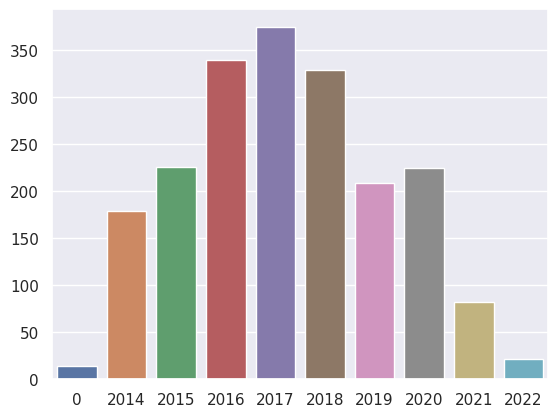

In [ ]:
plotArticleByYear(combined_data)